Inventory Management

In [1]:
#-------------------step1: importing libraries---------------------
import numpy as np # for araay and numericals
import random # for randomness
import matplotlib.pyplot as plt # for graph representations
from itertools import product # for genearting hyperparameters luke alpha, gamma, epsilon, etc

In [2]:
# defining the environment

class InventoryEnv: # creating a class here which can be used objects that can encapsulate the data and functions
  def __init__(self, max_stock=50, max_order=10,demand_range=(0,10)): # this is called a constructor. it has the papramenters for which instances need to be made
    self.max_stock=max_stock # parameter names max_stock value is assigned ti an istance variable self.max_stock which can be assesed by other methods in the class
    self.max_order=max_order
    self.demand_range=demand_range
    self.state=random.randint(0,max_stock) # random initial stock

  def step(self,action):
    order=action # action means number of units ordrered
    self.state=min(self.max_stock, self.state + order) # updated stock
    demand=random.randint(*self.demand_range) # random demand from the customers
    sold=min(demand,self.state) # sell what we have
    self.state-=sold # reduce the stock by demand
    reward=(sold*5)-(order*2) # profits from sales (each unit sold makes a profit of 5 units) - cost from odering
    if self.state==0:
      reward-=10 # heavy penalty for stockout
    return self.state, reward

def train_q_learning(alpha, gamma, epsilon, episodes):
  # initialize the Q-table
  q_table=np.zeros((51,11)) # max stock can range from 0 to 50 which means 51 and since the maximum number of oders can be 10 therefore there can only be 11 possible actions (including 0)
  env=InventoryEnv()
  training_rewards=[]
  for episode in range(episodes):
    state=env.state
    episode_reward=0
    for _ in range(30):
      if random.uniform(0,1)<epsilon:
        action=random.randint(0,env.max_order)
      else:
        action=np.argmax(q_table[state])
      next_state,reward=env.step(action)
      q_table[state,action]=q_table[state,action] + alpha*(reward+gamma*np.max(q_table[next_state])-q_table[state,action])
      state=next_state
      episode_reward+=reward
    training_rewards.append(episode_reward)
  return q_table, training_rewards


training with alpha=0.1, gamma=0.9,epsilon=0.1
training with alpha=0.1, gamma=0.9,epsilon=0.2
training with alpha=0.1, gamma=0.99,epsilon=0.1
training with alpha=0.1, gamma=0.99,epsilon=0.2
training with alpha=0.5, gamma=0.9,epsilon=0.1
training with alpha=0.5, gamma=0.9,epsilon=0.2
training with alpha=0.5, gamma=0.99,epsilon=0.1
training with alpha=0.5, gamma=0.99,epsilon=0.2


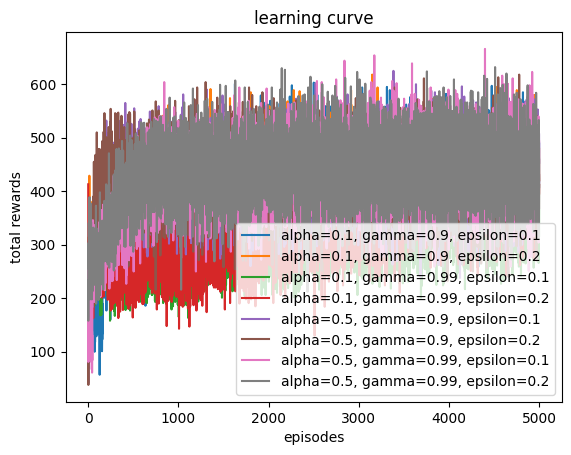

In [3]:

#hyperparameter grid
alpha_values=[0.1,0.5]# learning rate. if alpha value is too hight than Q value can change too much with each experience similarly to the kow value.
gamma_values=[0.9,0.99] # discount fcator is high here so it means that the future reward is as importart that too of the immediate rewards.
epsilon_values=[0.1,0.2] # exploration probability means how often the agent will choose to take a random actions instead choosing the best known action.
episodes=5000 # these specify the number of interactions or episodes agent will run to learn the optimal policy
results={}
for alpha,gamma,epsilon in product(alpha_values, gamma_values, epsilon_values):
  print(f"training with alpha={alpha}, gamma={gamma},epsilon={epsilon}")
  q_table,training_rewards=train_q_learning(alpha,gamma,epsilon,episodes)

  results[(alpha, gamma, epsilon)]=(q_table, training_rewards)
  plt.plot(training_rewards, label=f"alpha={alpha}, gamma={gamma}, epsilon={epsilon}")






# learning curve

plt.xlabel("episodes")
plt.ylabel("total rewards")
plt.title("learning curve")
plt.legend() # to identify different data series
plt.show()

In [5]:
best_hyperparameters=(0.5,0.99,0.1) # clearly the pink line shows the best outcome or rewards
q_table, rewards=results[best_hyperparameters]
# test the trained model
env=InventoryEnv()
state=random.randint(0,env.max_stock)
test_rewards=[]
for _ in range(30):
  action=np.argmax(q_table[state])
  state,reward=env.step(action)
  test_rewards.append(reward)
print("total reward: ", sum(test_rewards))


total reward:  425


In [6]:
print("Q-table",q_table) # rows shows the state and columns shows the action

Q-table [[1519.43129491 1526.94083267 1524.47906077 1536.87319181 1521.57560122
  1539.93462404 1534.57334923 1535.25567121 1543.46264694 1534.56903609
  1552.47531681]
 [1524.71866518 1515.62400586 1543.52559876 1533.98559511 1552.66152739
  1552.07893551 1538.9242435  1551.12620914 1551.6411618  1538.85368668
  1552.48056288]
 [1531.75349231 1538.16654115 1543.74212584 1546.36266831 1539.08536943
  1545.75439309 1543.53742005 1538.42303705 1547.15281811 1571.36983264
  1547.96964536]
 [1538.66123192 1535.28118574 1547.12620588 1544.05303694 1550.25450765
  1557.57498812 1550.70088143 1550.8484529  1542.54225086 1550.86931016
  1543.792275  ]
 [1543.53475483 1545.85216086 1548.11183752 1552.38225805 1551.313424
  1549.55249634 1562.304261   1549.80145544 1552.64916863 1552.88871243
  1544.92058491]
 [1552.6940796  1554.83783237 1553.63254882 1552.75556484 1557.58174124
  1556.19762416 1551.38495836 1551.57185694 1563.80104063 1551.21669182
  1557.99365922]
 [1552.70814757 1558.5876186